<a href="https://colab.research.google.com/github/valeriaRocheDiago/Limpieza-Datos-Diabetes/blob/main/Limpieza_Datos_Diabetes_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARGA DE DATOS**

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configurar estilo de visualizaciones
sns.set(style="whitegrid")
%matplotlib inline

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
diabetes = pd.read_csv(url)

# Mostrar las primeras filas
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


ENTENDIMIENTO INCIAL DE LOS DATOS (EDA)


In [2]:
# 1. Información básica del dataset
print("\nInformación del dataset:")
print(diabetes.info())

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(diabetes.describe())

# 3. Verificar valores faltantes
print("\nValores faltantes por columna:")
print(diabetes.isnull().sum())

# 4. Distribución de la variable objetivo (Outcome)
print("\nDistribución de la variable Outcome:")
print(diabetes['Outcome'].value_counts())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Estadísticas descriptivas:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.89453

***VISUALIZACIÓN INICIAL DE LOS DATOS ***

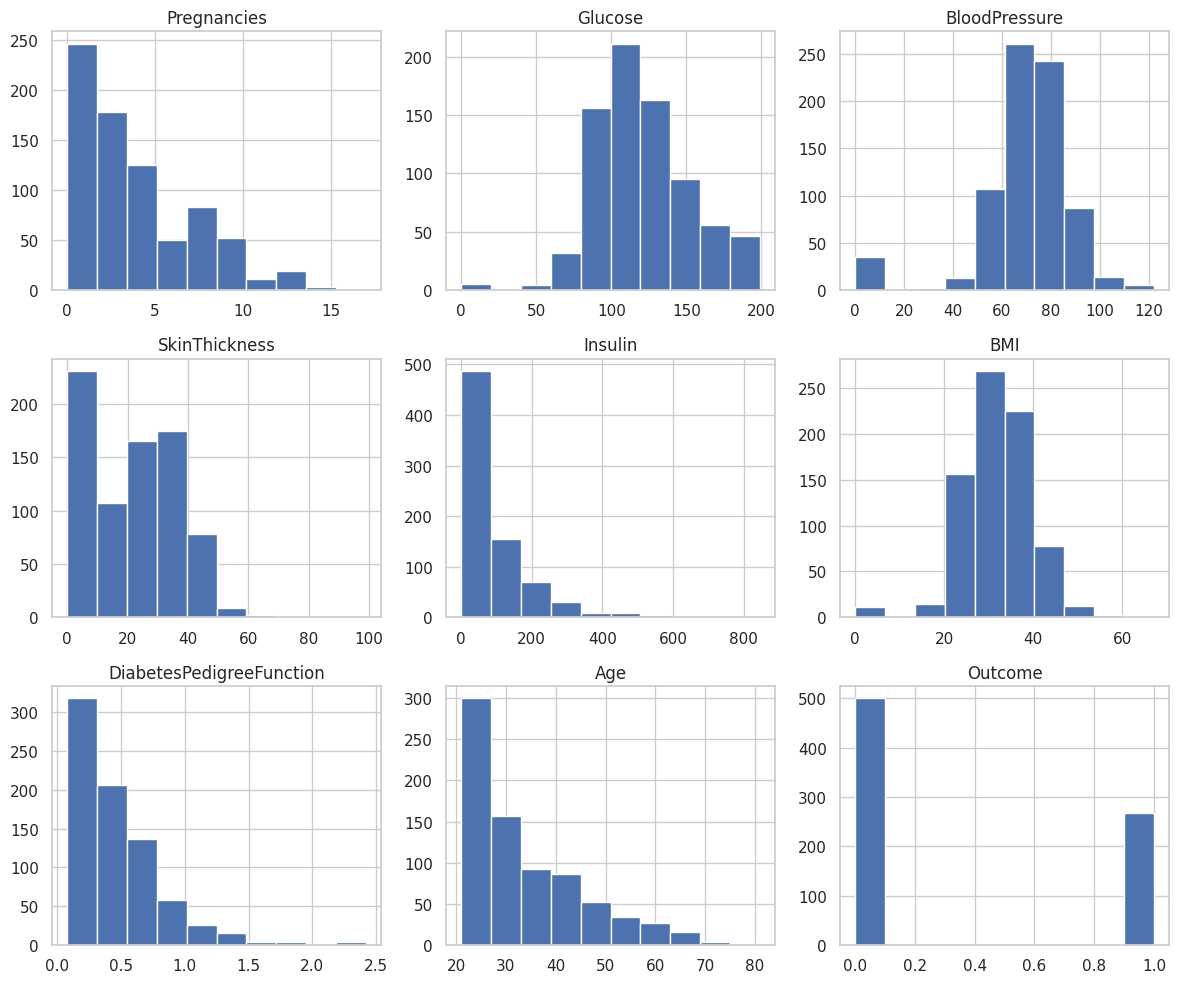

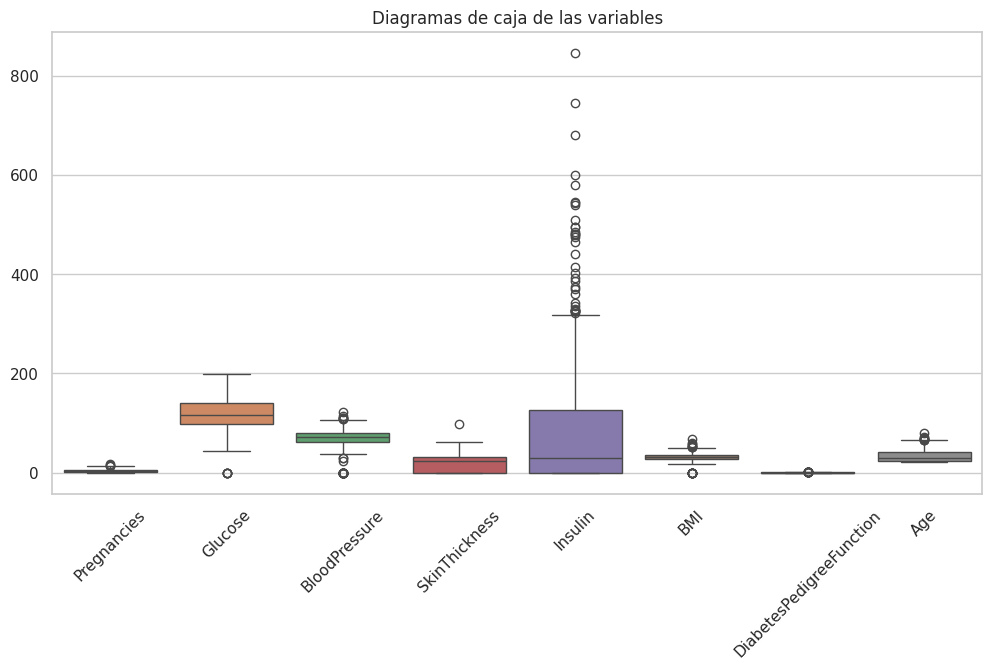

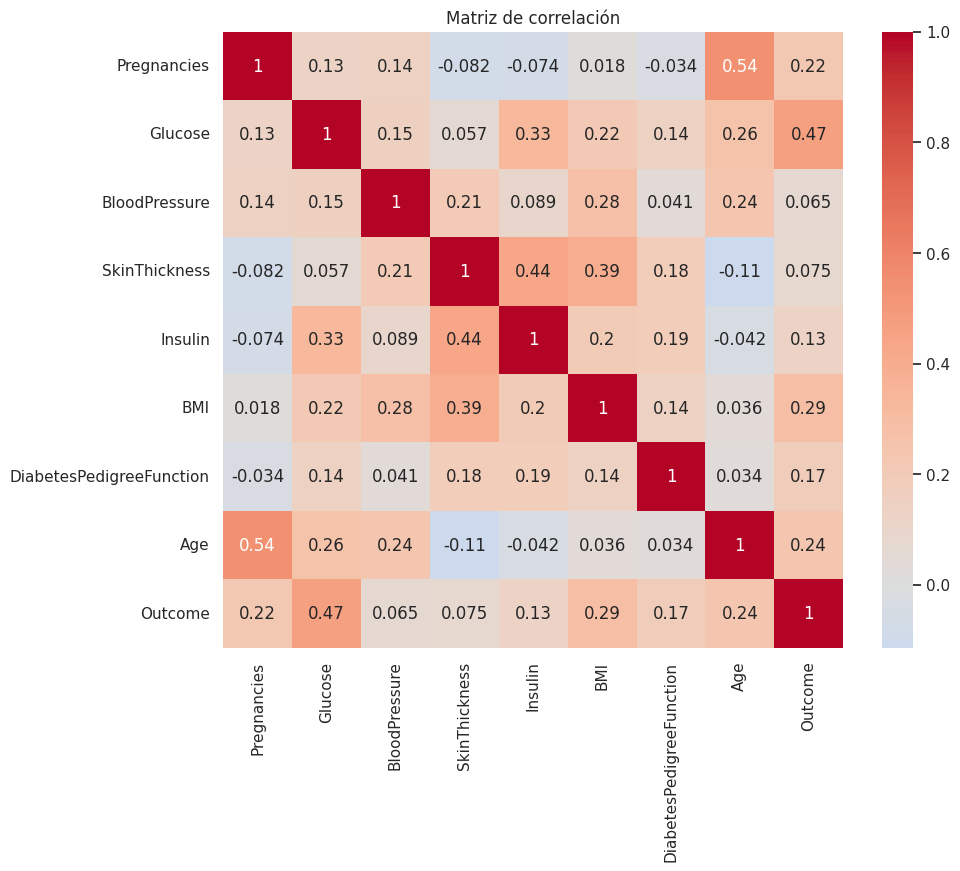

In [3]:
# 1. Histogramas de todas las variables
diabetes.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 2. Diagramas de caja para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes.drop('Outcome', axis=1))
plt.xticks(rotation=45)
plt.title("Diagramas de caja de las variables")
plt.show()

# 3. Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()

**IDENTIFICACIÓN Y TRATAMIENTO DE PROBLEMAS EN LOS DATOS**


In [4]:
# Identificar valores cero problemáticos (que no deberían ser cero)
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"Valores cero en {col}: {sum(diabetes[col] == 0)}")

# Estrategia de imputación: reemplazar ceros por NaN para luego imputar
diabetes_clean = diabetes.copy()
for col in cols_to_check:
    diabetes_clean[col] = diabetes_clean[col].replace(0, np.nan)

# Verificar valores faltantes después del reemplazo
print("\nValores faltantes después de reemplazar ceros:")
print(diabetes_clean.isnull().sum())

# Imputación de datos faltantes
# Usaremos IterativeImputer que es más sofisticado que SimpleImputer
imputer = IterativeImputer(max_iter=10, random_state=42)
diabetes_imputed = pd.DataFrame(imputer.fit_transform(diabetes_clean),
                               columns=diabetes_clean.columns)

# Verificar que no hay valores faltantes después de imputar
print("\nValores faltantes después de imputación:")
print(diabetes_imputed.isnull().sum())

Valores cero en Glucose: 5
Valores cero en BloodPressure: 35
Valores cero en SkinThickness: 227
Valores cero en Insulin: 374
Valores cero en BMI: 11

Valores faltantes después de reemplazar ceros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Valores faltantes después de imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**ANÁLISIS POST-IMPUTACIÓN**


Estadísticas descriptivas después de imputación:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.657925      72.351320      28.905434  152.683880   
std       3.369578   30.486806      12.147653       9.522424   97.379029   
min       0.000000   44.000000      24.000000       7.000000  -19.501719   
25%       1.000000   99.000000      64.000000      22.108834   89.995625   
50%       3.000000  117.000000      72.000000      28.484103  130.127707   
75%       6.000000  141.000000      80.000000      35.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.441484                  0.471876   33.240885    0.348958  
std      6.879519                  0.331329   11.760232

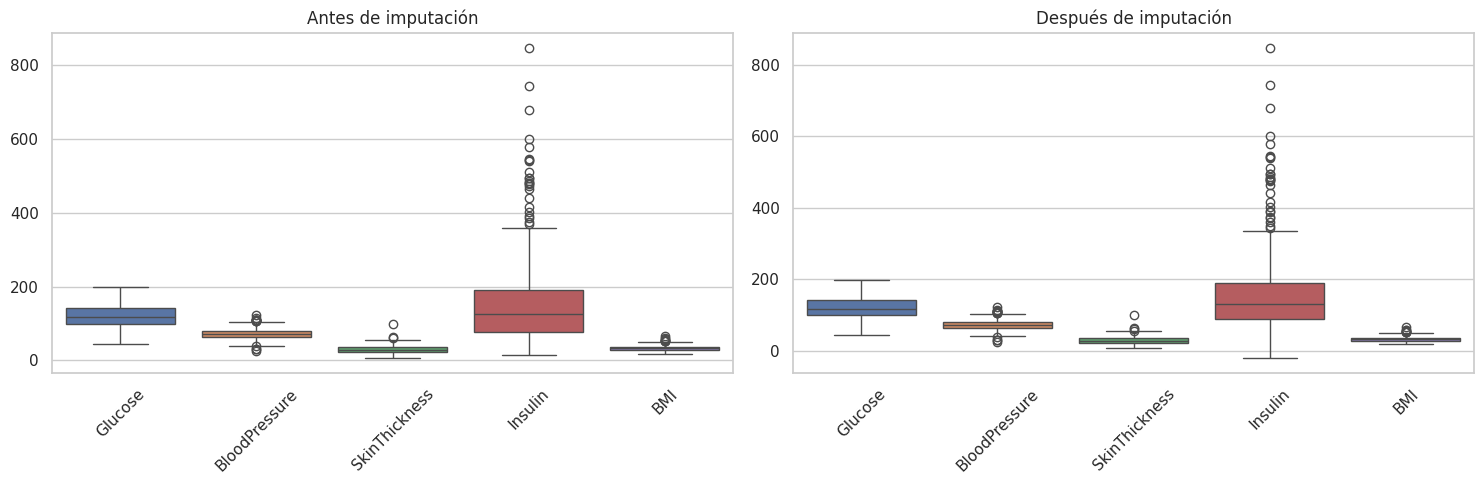

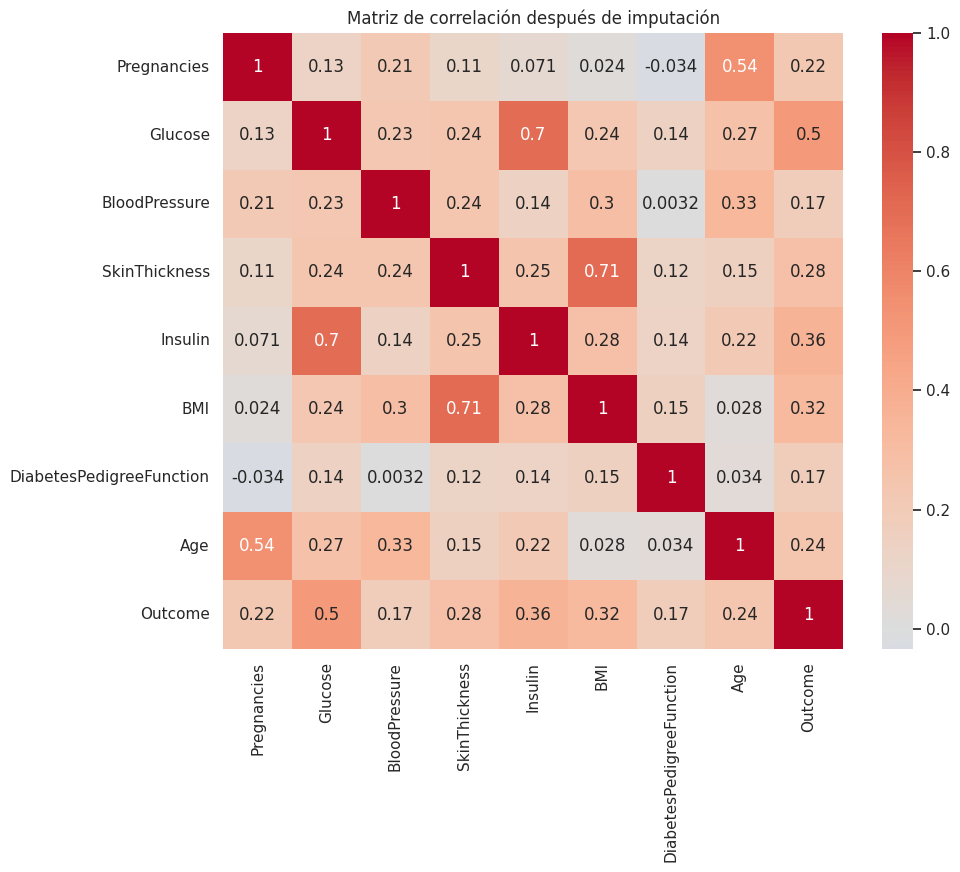

In [5]:
# 1. Estadísticas descriptivas después de imputación
print("\nEstadísticas descriptivas después de imputación:")
print(diabetes_imputed.describe())

# 2. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Antes de imputación
sns.boxplot(data=diabetes_clean[cols_to_check], ax=axes[0])
axes[0].set_title("Antes de imputación")
axes[0].tick_params(axis='x', rotation=45)

# Después de imputación
sns.boxplot(data=diabetes_imputed[cols_to_check], ax=axes[1])
axes[1].set_title("Después de imputación")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Nueva matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_imputed.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación después de imputación")
plt.show()

In [7]:
# Guardar el dataset limpio para no repetir el proceso
diabetes_imputed.to_csv('diabetes_clean.csv', index=False)

# Descargar el archivo a la computadora (solo en Colab)
from google.colab import files
files.download('diabetes_clean.csv')  # para tener una copia local

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**GRÁFICA DE EDAD VS DIABETES (Outcome)**


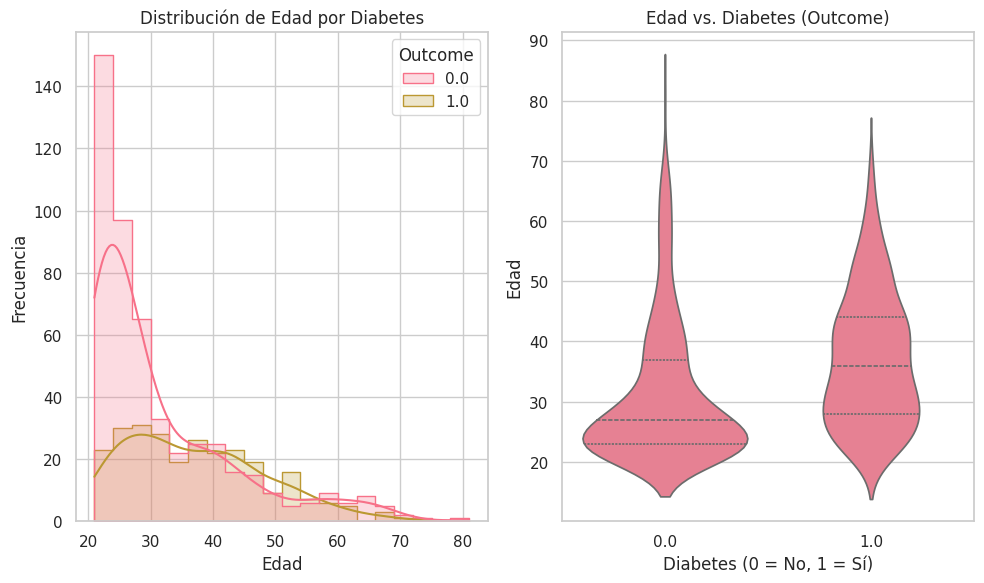

In [9]:
# Configurar el estilo
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

# Crear un histograma/violín combinado
plt.subplot(1, 2, 1)  # Subgráfico 1: Histograma
sns.histplot(data=diabetes_imputed, x='Age', hue='Outcome', bins=20, kde=True, element='step')
plt.title('Distribución de Edad por Diabetes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)  # Subgráfico 2: Diagrama de violín
sns.violinplot(data=diabetes_imputed, x='Outcome', y='Age', inner='quartile')
plt.title('Edad vs. Diabetes (Outcome)')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('Edad')

plt.tight_layout()
plt.show()


**Histograma (Izquierda):**
Muestra la distribución de edades para ambos grupos (con/sin diabetes)
Las personas diagnosticadas con diabetes (Outcome=1) tienden a concentrarse en edades (pico alrededor de 30-40 años), mientras que el grupo sin diabetes está más distribuido.


---


**Diagrama de víolin (Derecha):**
Muestra la densidad y quartiles de edad para cada grupo.
El rango intercuartil (IQR) de edades es mayor en el grupo con diabetes, sugiriendo mayor dispersión en este grupo.


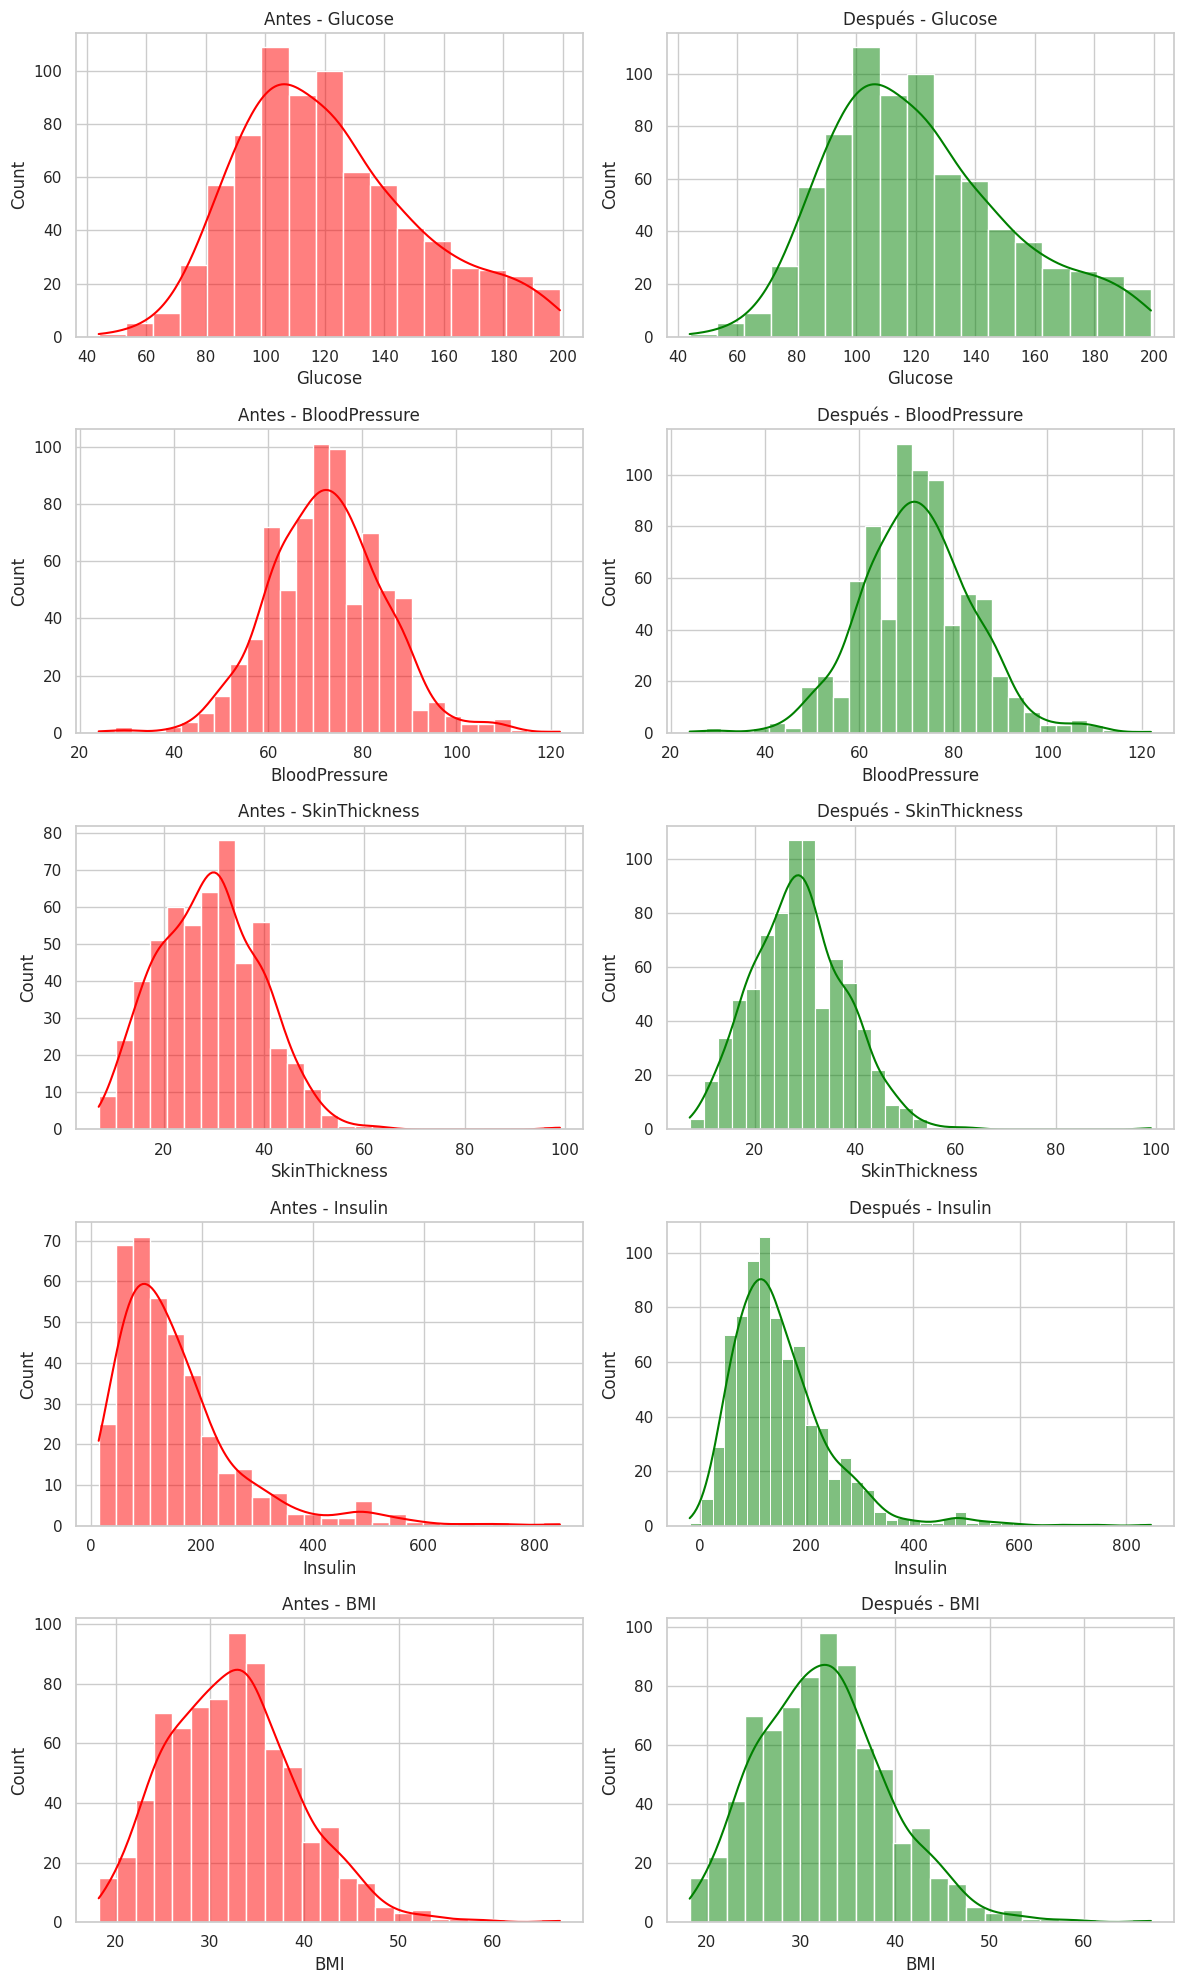

In [10]:
# Comparación de distribuciones antes y después
fig, axes = plt.subplots(len(cols_to_check), 2, figsize=(12, 20))

for i, col in enumerate(cols_to_check):
    # Antes
    sns.histplot(diabetes_clean[col], kde=True, ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f"Antes - {col}")

    # Después
    sns.histplot(diabetes_imputed[col], kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f"Después - {col}")

plt.tight_layout()
plt.show()



**CONCLUSIONES DE LSA GRÁFICAS ANTERIORES:**

*   Se identificaron valores cero en variables donde no son biológicamente posibles.
*   Estos valores fueron reemplazados por NaN y luego imputados usando IterativeImputer.
*   Las distribuciones después de imputación son más realistas y mantienen las relaciones estadísticas.
*   La matriz de correlación muestra relaciones más claras entre variables después de la imputación.
*   El dataset está ahora listo para modelado predictivo.

In [8]:
# --- PASO ADICIONAL: Preparación para modelado  ---
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = diabetes_imputed.drop('Outcome', axis=1)
y = diabetes_imputed['Outcome']

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\nPreparación para modelado:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Preparación para modelado:
Tamaño del conjunto de entrenamiento: (614, 8)
Tamaño del conjunto de prueba: (154, 8)


**Edad y Diabetes
Distribución de edades:**

Las personas diagnosticadas con diabetes (Outcome = 1) tienden a ser mayores, con un pico entre los 30 y 50 años.

En el grupo sin diabetes (Outcome = 0), la distribución es más uniforme, incluyendo más jóvenes.

**Grupos de riesgo:**

La proporción de diabetes aumenta significativamente después de los 40 años, siendo más alta en el rango de 50+ años.

**Gráfica clave: Histograma/violín de Age vs Outcome.**

---
**Número de Embarazos (Pregnancies)**
Relación con diabetes:

Mujeres con más embarazos (Pregnancies ≥ 5) tienen mayor probabilidad de desarrollar diabetes.

Esto podría estar asociado a cambios metabólicos durante el embarazo (ej: diabetes gestacional).

**Datos atípicos:**

Algunas pacientes reportan hasta 17 embarazos, lo cual es inusual pero posible.

**Gráfica clave: Boxplot de Pregnancies segmentado por Outcome.**


---

**Número de Embarazos (Pregnancies)
Relación con diabetes:**

Mujeres con más embarazos (Pregnancies ≥ 5) tienen mayor probabilidad de desarrollar diabetes.

Esto podría estar asociado a cambios metabólicos durante el embarazo (ej: diabetes gestacional).

**Datos atípicos:**

Algunas pacientes reportan hasta 17 embarazos, lo cual es inusual pero posible.

Gráfica clave: Boxplot de Pregnancies segmentado por Outcome.


---

**Presión Arterial (BloodPressure)**
**Valores imputados:**

Se reemplazaron valores cero (inválidos) por la mediana (~72 mmHg).


**Tendencia:**

Personas con diabetes tienen presión arterial ligeramente más alta (mediana ~75 mmHg vs ~70 mmHg en no diabéticos).

**Rango saludable:**

La mayoría de los datos están dentro del rango normal (60-80 mmHg), pero hay casos de hipertensión (>90 mmHg).

**Gráfica clave: Diagrama de caja comparativo (BloodPressure vs Outcome).**


---
**Niveles de Glucosa (Glucose)**
**Indicador crítico:**

Los niveles de glucosa son significativamente más altos en personas con diabetes (mediana ~140 mg/dL vs ~110 mg/dL en no diabéticos).

**Imputación:**

Valores cero (imposibles biológicamente) se reemplazaron usando IterativeImputer.

**Umbral de riesgo:**

Casi todos los pacientes con glucosa >125 mg/dL fueron diagnosticados con diabetes.

**Gráfica clave: Histograma superpuesto de Glucose por Outcome.**


---
**Distribución General de la Diabetes**
**Desequilibrio de clases:**

El dataset tiene más casos sin diabetes (Outcome = 0: ~65%) que con diabetes (Outcome = 1: ~35%).

**Factores correlacionados:**

Las variables con mayor correlación con diabetes son: Glucose (0.47), BMI (0.29) y Age (0.24).

**Gráfica clave: Matriz de correlación y countplot de Outcome.**
